In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv('C:\\Users\\mps\\OneDrive - University of Waterloo\\Documents\\657A\\A2\\A2\\Covid\\covid_train.csv',delimiter=',', error_bad_lines=False, warn_bad_lines=True)
df

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,50s,MALE,NO KNOWN EPI LINK,Oakville,NaN,43.413997,-79.744796,Resolved
1,20s,FEMALE,CC,Guelph,NaN,43.524881,-80.233743,Not Resolved
2,90s,FEMALE,OB,Barrie,Yes,44.410713,-79.686306,Resolved
3,20s,FEMALE,MISSING INFORMATION,Toronto,NaN,43.656591,-79.379358,Resolved
4,90s,FEMALE,OB,Ottawa,Yes,45.345665,-75.763912,Fatal
...,...,...,...,...,...,...,...,...
14846,<20,FEMALE,CC,Hamilton,NaN,43.257631,-79.871341,Not Resolved
14847,20s,FEMALE,NO KNOWN EPI LINK,Mississauga,NaN,43.647471,-79.708893,Not Resolved
14848,80s,MALE,OB,Thorold,Yes,43.116537,-79.241220,Fatal
14849,50s,FEMALE,CC,Newmarket,NaN,44.048023,-79.480239,Fatal


In [3]:
df.nunique()

Age_Group                   9
Client_Gender               4
Case_AcquisitionInfo        6
Reporting_PHU_City         34
Outbreak_Related            1
Reporting_PHU_Latitude     34
Reporting_PHU_Longitude    34
Outcome1                    3
dtype: int64

In [4]:
df['Client_Gender'].value_counts()

FEMALE            7499
MALE              7243
UNSPECIFIED        107
GENDER DIVERSE       2
Name: Client_Gender, dtype: int64

In [5]:
df.isnull().sum()

Age_Group                     6
Client_Gender                 0
Case_AcquisitionInfo          0
Reporting_PHU_City            0
Outbreak_Related           9020
Reporting_PHU_Latitude        0
Reporting_PHU_Longitude       0
Outcome1                      0
dtype: int64

In [6]:
df['Outbreak_Related'].replace(np.nan, 'No',inplace=True)
df

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,50s,MALE,NO KNOWN EPI LINK,Oakville,No,43.413997,-79.744796,Resolved
1,20s,FEMALE,CC,Guelph,No,43.524881,-80.233743,Not Resolved
2,90s,FEMALE,OB,Barrie,Yes,44.410713,-79.686306,Resolved
3,20s,FEMALE,MISSING INFORMATION,Toronto,No,43.656591,-79.379358,Resolved
4,90s,FEMALE,OB,Ottawa,Yes,45.345665,-75.763912,Fatal
...,...,...,...,...,...,...,...,...
14846,<20,FEMALE,CC,Hamilton,No,43.257631,-79.871341,Not Resolved
14847,20s,FEMALE,NO KNOWN EPI LINK,Mississauga,No,43.647471,-79.708893,Not Resolved
14848,80s,MALE,OB,Thorold,Yes,43.116537,-79.241220,Fatal
14849,50s,FEMALE,CC,Newmarket,No,44.048023,-79.480239,Fatal


In [7]:
df[df['Age_Group'].isnull()]

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
1231,NaN,FEMALE,OB,Sudbury,No,46.466092,-80.998059,Not Resolved
3475,NaN,FEMALE,OB,Windsor,Yes,42.308796,-83.033670,Not Resolved
11384,NaN,UNSPECIFIED,NO KNOWN EPI LINK,Simcoe,No,42.847825,-80.303815,Not Resolved
11666,NaN,FEMALE,CC,Newmarket,No,44.048023,-79.480239,Resolved
12197,NaN,UNSPECIFIED,NO KNOWN EPI LINK,Windsor,No,42.308796,-83.033670,Fatal
12884,NaN,UNSPECIFIED,NO KNOWN EPI LINK,Windsor,No,42.308796,-83.033670,Resolved


In [8]:
df[['Client_Gender','Age_Group']].value_counts()

Client_Gender   Age_Group
FEMALE          90s          1209
                80s          1178
MALE            20s          1075
                80s          1013
FEMALE          20s           984
MALE            60s           834
                50s           832
                30s           819
                70s           795
FEMALE          50s           793
                30s           777
                40s           742
MALE            40s           679
FEMALE          70s           633
MALE            <20           602
                90s           594
FEMALE          60s           590
                <20           590
UNSPECIFIED     80s            21
                20s            16
                90s            15
                30s            13
                <20            10
                60s             8
                40s             8
                50s             7
                70s             6
GENDER DIVERSE  30s             1
                <20   

In [9]:
df_female = df[df.Client_Gender=='FEMALE']
df_female['Age_Group'].fillna('90s',inplace = True)
df_unsp = df[df.Client_Gender=='UNSPECIFIED']
df_unsp['Age_Group'].fillna('80s',inplace = True)
df_gd = df[df.Client_Gender=='GENDER DIVERSE']
df_male = df[df.Client_Gender=='MALE']
df_final = df_male.append([df_gd,df_unsp,df_female])
df_final.shape

(14851, 8)

In [10]:
df_final["Age_Group"].replace({"90s": 90, "80s": 80,"70s": 70, "60s": 60,"50s": 50, "40s": 40,"30s": 30, "20s": 20, "<20": 19 }, inplace=True)
df_final

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,50,MALE,NO KNOWN EPI LINK,Oakville,No,43.413997,-79.744796,Resolved
5,60,MALE,OB,Newmarket,Yes,44.048023,-79.480239,Fatal
6,70,MALE,NO KNOWN EPI LINK,Thorold,No,43.116537,-79.241220,Fatal
7,50,MALE,MISSING INFORMATION,Toronto,No,43.656591,-79.379358,Not Resolved
10,30,MALE,NO KNOWN EPI LINK,Ottawa,No,45.345665,-75.763912,Resolved
...,...,...,...,...,...,...,...,...
14845,80,FEMALE,OB,Toronto,Yes,43.656591,-79.379358,Fatal
14846,19,FEMALE,CC,Hamilton,No,43.257631,-79.871341,Not Resolved
14847,20,FEMALE,NO KNOWN EPI LINK,Mississauga,No,43.647471,-79.708893,Not Resolved
14849,50,FEMALE,CC,Newmarket,No,44.048023,-79.480239,Fatal


In [11]:
df_final = df_final[(df_final.Client_Gender!='GENDER DIVERSE')]
df_final = df_final[(df_final.Reporting_PHU_City!='New Liskeard')]
df_final = df_final[(df_final.Reporting_PHU_City!='Kenora')]
df_final

,Age_Group,Client_Gender,Case_AcquisitionInfo,Reporting_PHU_City,Outbreak_Related,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1
0,50,MALE,NO KNOWN EPI LINK,Oakville,No,43.413997,-79.744796,Resolved
5,60,MALE,OB,Newmarket,Yes,44.048023,-79.480239,Fatal
6,70,MALE,NO KNOWN EPI LINK,Thorold,No,43.116537,-79.241220,Fatal
7,50,MALE,MISSING INFORMATION,Toronto,No,43.656591,-79.379358,Not Resolved
10,30,MALE,NO KNOWN EPI LINK,Ottawa,No,45.345665,-75.763912,Resolved
...,...,...,...,...,...,...,...,...
14845,80,FEMALE,OB,Toronto,Yes,43.656591,-79.379358,Fatal
14846,19,FEMALE,CC,Hamilton,No,43.257631,-79.871341,Not Resolved
14847,20,FEMALE,NO KNOWN EPI LINK,Mississauga,No,43.647471,-79.708893,Not Resolved
14849,50,FEMALE,CC,Newmarket,No,44.048023,-79.480239,Fatal


In [12]:
df_final.nunique()

Age_Group                   9
Client_Gender               3
Case_AcquisitionInfo        6
Reporting_PHU_City         32
Outbreak_Related            2
Reporting_PHU_Latitude     32
Reporting_PHU_Longitude    32
Outcome1                    3
dtype: int64

In [13]:
dataset = pd.get_dummies(df_final, columns = ['Client_Gender', 'Case_AcquisitionInfo', 'Reporting_PHU_City', 'Outbreak_Related'])
dataset

,Age_Group,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Outcome1,Client_Gender_FEMALE,Client_Gender_MALE,Client_Gender_UNSPECIFIED,Case_AcquisitionInfo_CC,Case_AcquisitionInfo_MISSING INFORMATION,Case_AcquisitionInfo_NO KNOWN EPI LINK,...,Reporting_PHU_City_Sudbury,Reporting_PHU_City_Thorold,Reporting_PHU_City_Thunder Bay,Reporting_PHU_City_Timmins,Reporting_PHU_City_Toronto,Reporting_PHU_City_Waterloo,Reporting_PHU_City_Whitby,Reporting_PHU_City_Windsor,Outbreak_Related_No,Outbreak_Related_Yes
0,50,43.413997,-79.744796,Resolved,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
5,60,44.048023,-79.480239,Fatal,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,70,43.116537,-79.241220,Fatal,0,1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
7,50,43.656591,-79.379358,Not Resolved,0,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
10,30,45.345665,-75.763912,Resolved,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,80,43.656591,-79.379358,Fatal,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
14846,19,43.257631,-79.871341,Not Resolved,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
14847,20,43.647471,-79.708893,Not Resolved,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
14849,50,44.048023,-79.480239,Fatal,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [14]:
#Dividiing each dataset into features(X) and target(Y)
target=["Outcome1"]
cols=[col for col in dataset.columns if col not in target]

x=dataset[cols]
y=dataset[target]

In [15]:
df_test = pd.read_csv('C:\\Users\\mps\\OneDrive - University of Waterloo\\Documents\\657A\\A2\\A2\\Covid\\Kaggle\\covid_test.csv',delimiter=',', error_bad_lines=False, warn_bad_lines=True)
df_test['Outbreak_Related'].replace(np.nan, 'No',inplace=True)
df_test1 = df_test.drop('id',axis=1)
df_test1["Age_Group"].replace({"90s": 90, "80s": 80,"70s": 70, "60s": 60,"50s": 50, "40s": 40,"30s": 30, "20s": 20, "<20": 19 }, inplace=True)
dataset_test = pd.get_dummies(df_test1, columns = ['Client_Gender', 'Case_AcquisitionInfo','Reporting_PHU_City', 'Outbreak_Related'])
dataset_test

,Age_Group,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Client_Gender_FEMALE,Client_Gender_MALE,Client_Gender_UNSPECIFIED,Case_AcquisitionInfo_CC,Case_AcquisitionInfo_MISSING INFORMATION,Case_AcquisitionInfo_NO KNOWN EPI LINK,Case_AcquisitionInfo_OB,...,Reporting_PHU_City_Sudbury,Reporting_PHU_City_Thorold,Reporting_PHU_City_Thunder Bay,Reporting_PHU_City_Timmins,Reporting_PHU_City_Toronto,Reporting_PHU_City_Waterloo,Reporting_PHU_City_Whitby,Reporting_PHU_City_Windsor,Outbreak_Related_No,Outbreak_Related_Yes
0,80,43.656591,-79.379358,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,80,43.656591,-79.379358,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,40,43.368662,-81.001913,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,30,43.647471,-79.708893,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,60,42.981468,-81.254016,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708,80,43.898605,-78.940341,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3709,30,43.656591,-79.379358,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3710,80,43.413997,-79.744796,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3711,80,43.116537,-79.241220,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


## Without scaling

  Max_depth  Mean Accuracy
0         3         0.6514
1         5         0.6596
2        10         0.6574
3      None         0.6470


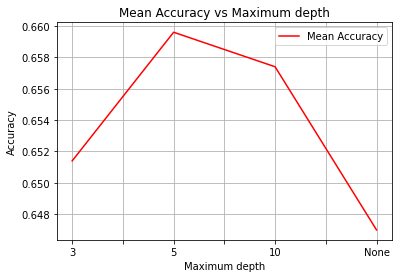

In [16]:
def dt_classifier(depth=None,min_leaf=1):
    DTclassifier = DecisionTreeClassifier(random_state = 0,max_depth=depth,min_samples_leaf=min_leaf)
    scores = cross_val_score(DTclassifier, x, y, cv=10)
    acc=round(scores.mean(),4)
    return acc

depth=[]
res=[]
res.append(dt_classifier(depth=3))
depth.append(3)
res.append(dt_classifier(depth=5))
depth.append(5)
res.append(dt_classifier(depth=10))
depth.append(10)
res.append(dt_classifier(min_leaf=2))
depth.append('None')
a=list(zip(depth,res))
df_dt_acc = pd.DataFrame(a, columns = ['Max_depth', 'Mean Accuracy'])
print(df_dt_acc)

#Plot graph for different maximum depth values and corresponding accuracy scores
df_dt_acc.plot(x='Max_depth', y='Mean Accuracy', color='red');
plt.grid();
plt.title('Mean Accuracy vs Maximum depth');
plt.xlabel('Maximum depth');
plt.ylabel('Accuracy');

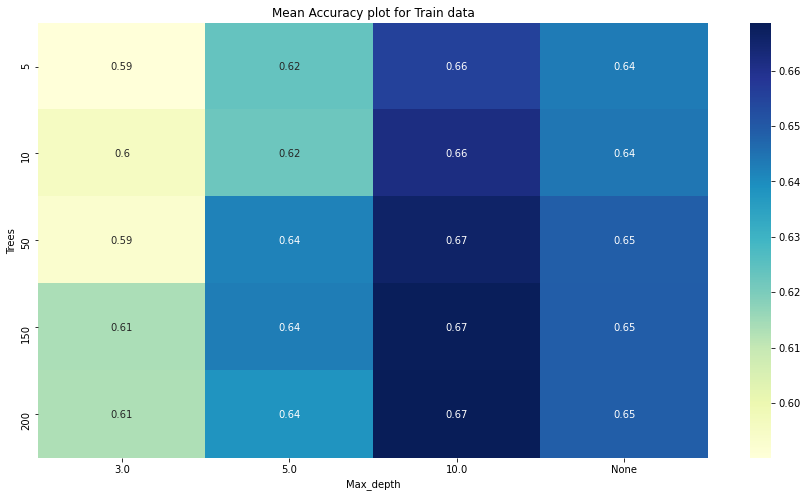

In [17]:
def rf_classifier(estimators,max_depth=None):
    RFclassifier = RandomForestClassifier(n_estimators=estimators,random_state = 0,max_depth=max_depth)
    scores = cross_val_score(RFclassifier, x, y.values.ravel(), cv=10)
    acc=round(scores.mean(),4)
    return acc

trees = [5, 10, 50, 150, 200]
depth = [3, 5, 10, None]
tree_depth_acc=[]
for i in trees:
    for j in depth:
        tree_depth_acc.append([i,j,rf_classifier(estimators=i,max_depth=j)])
df_rf_acc = pd.DataFrame(tree_depth_acc, columns = ['Trees', 'Max_depth','Mean Accuracy'])
df_rf_acc.replace(np.nan,'None',inplace=True)
df_rf_acc

df_rf_acc=df_rf_acc.pivot(index='Trees',columns='Max_depth',values='Mean Accuracy')
#Plotting the graph
plt.figure(figsize=(15,8))
sns.heatmap(data=df_rf_acc,annot=True,cmap="YlGnBu")
plt.title("Mean Accuracy plot for Train data")
plt.show()

In [18]:
df_rf_acc

Max_depth,3.0,5.0,10.0,None
Trees,,,,
5,0.5901,0.6237,0.6556,0.6433
10,0.5958,0.6223,0.6617,0.6443
50,0.5929,0.6421,0.6659,0.6487
150,0.6135,0.6431,0.6681,0.6491
200,0.6133,0.6384,0.6686,0.6489


   Estimators  Mean Accuracy
0           5         0.6593
1          10         0.6603
2          50         0.6688
3         150         0.6669
4         200         0.6665


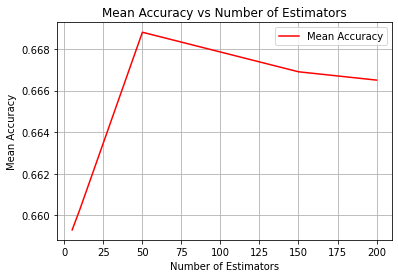

In [19]:
def gb_classifier(estimators):
    gbclassifier = GradientBoostingClassifier(n_estimators=estimators,random_state = 0)
    scores = cross_val_score(gbclassifier, x, y.values.ravel(), cv=10)
    acc=round(scores.mean(),4)
    return acc

bstages = [5, 10, 50, 150, 200]
bstages_acc=[]
for i in bstages:
    bstages_acc.append([i,gb_classifier(estimators=i)])
df_gb_acc = pd.DataFrame(bstages_acc, columns = ['Estimators','Mean Accuracy'])
print(df_gb_acc)

#Plot graph for different number of estimators and corresponding accuracy scores
df_gb_acc.plot(x='Estimators', y='Mean Accuracy', color='red');
plt.grid();
plt.title('Mean Accuracy vs Number of Estimators');
plt.xlabel('Number of Estimators');
plt.ylabel('Mean Accuracy');

In [20]:
def nb_classifier(var_smooth):
    nbclassifier = GaussianNB(var_smoothing=var_smooth)
    nbclassifier.fit(x,y.values.ravel())
    scores = cross_val_score(nbclassifier, x, y.values.ravel(), cv=10)
    acc_mean=scores.mean()
    return acc_mean

smooth = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
smooth_acc=[]
for i in smooth:
    z=nb_classifier(var_smooth=i)
    smooth_acc.append([i,z])
df_nb_acc = pd.DataFrame(smooth_acc, columns = ['Smoothing_Value','Mean Accuracy'])
df_nb_acc

,Smoothing_Value,Mean Accuracy
0,1.000000e-10,0.531620
1,1.000000e-09,0.546789
2,1.000000e-05,0.605313
3,1.000000e-03,0.650283
4,1.000000e-01,0.592436


In [21]:
gbclassifier = GradientBoostingClassifier(n_estimators=50,random_state = 0)
gbclassifier.fit(x,y)
yGB = gbclassifier.predict(dataset_test)
y1=np.where(yGB=='Not Resolved','not Resolved',np.where(yGB=='Resolved','resolved',np.where(yGB=='Fatal','fatal',yGB)))
y2 =pd.DataFrame(y1,columns=['Outcome1'])
covid_t1 =pd.DataFrame(df_test['id'],columns=['id'])
y_final = pd.concat([covid_t1, y2], axis=1)
y_final
y_final.to_csv(r'C:\\Users\\mps\\OneDrive - University of Waterloo\\Documents\\657A\\A2\\A2\\Covid\Kaggle\\covid__gb26.2.csv',index=False)

## Analysis using scaling

In [22]:
dataset1=x.copy()
scale = StandardScaler()
columns_to_scale = ['Age_Group', 'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude']
dataset1[columns_to_scale] = scale.fit_transform(dataset1[columns_to_scale])

  Max_depth  Mean Accuracy
0         3         0.6514
1         5         0.6596
2        10         0.6574
3      None         0.6470


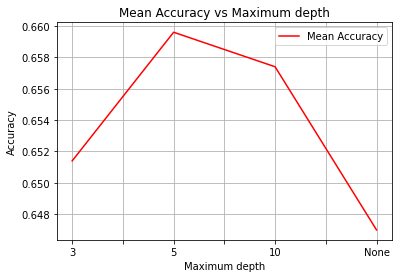

In [23]:
def dt_classifier(depth=None,min_leaf=1):
    DTclassifier = DecisionTreeClassifier(random_state = 0,max_depth=depth,min_samples_leaf=min_leaf)
    scores = cross_val_score(DTclassifier, dataset1, y, cv=10)
    acc=round(scores.mean(),4)
    return acc

depth=[]
res=[]
res.append(dt_classifier(depth=3))
depth.append(3)
res.append(dt_classifier(depth=5))
depth.append(5)
res.append(dt_classifier(depth=10))
depth.append(10)
res.append(dt_classifier(min_leaf=2))
depth.append('None')
a=list(zip(depth,res))
df_dt_acc = pd.DataFrame(a, columns = ['Max_depth', 'Mean Accuracy'])
print(df_dt_acc)

#Plot graph for different maximum depth values and corresponding accuracy scores
df_dt_acc.plot(x='Max_depth', y='Mean Accuracy', color='red');
plt.grid();
plt.title('Mean Accuracy vs Maximum depth');
plt.xlabel('Maximum depth');
plt.ylabel('Accuracy');

In [24]:
dataset1_test=dataset_test.copy()
scale = StandardScaler()
columns_to_scale = ['Age_Group', 'Reporting_PHU_Latitude', 'Reporting_PHU_Longitude']
dataset1_test[columns_to_scale] = scale.fit_transform(dataset_test[columns_to_scale])
dataset1_test

,Age_Group,Reporting_PHU_Latitude,Reporting_PHU_Longitude,Client_Gender_FEMALE,Client_Gender_MALE,Client_Gender_UNSPECIFIED,Case_AcquisitionInfo_CC,Case_AcquisitionInfo_MISSING INFORMATION,Case_AcquisitionInfo_NO KNOWN EPI LINK,Case_AcquisitionInfo_OB,...,Reporting_PHU_City_Sudbury,Reporting_PHU_City_Thorold,Reporting_PHU_City_Thunder Bay,Reporting_PHU_City_Timmins,Reporting_PHU_City_Toronto,Reporting_PHU_City_Waterloo,Reporting_PHU_City_Whitby,Reporting_PHU_City_Windsor,Outbreak_Related_No,Outbreak_Related_Yes
0,1.104099,-0.082726,0.138691,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
1,1.104099,-0.082726,0.138691,0,1,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,1
2,-0.505734,-0.473406,-0.911923,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3,-0.908192,-0.095101,-0.074685,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
4,0.299183,-0.998771,-1.075161,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3708,1.104099,0.245652,0.422957,0,1,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3709,-0.908192,-0.082726,0.138691,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,1,0
3710,1.104099,-0.411892,-0.097932,0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
3711,1.104099,-0.815503,0.228136,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,1


    Trees Max_depth  Mean Accuracy
0       5         3         0.5901
1       5         5         0.6237
2       5        10         0.6555
3       5      None         0.6431
4      10         3         0.5958
5      10         5         0.6223
6      10        10         0.6616
7      10      None         0.6442
8      50         3         0.5929
9      50         5         0.6421
10     50        10         0.6659
11     50      None         0.6487
12    150         3         0.6135
13    150         5         0.6431
14    150        10         0.6680
15    150      None         0.6487
16    200         3         0.6133
17    200         5         0.6384
18    200        10         0.6687
19    200      None         0.6486


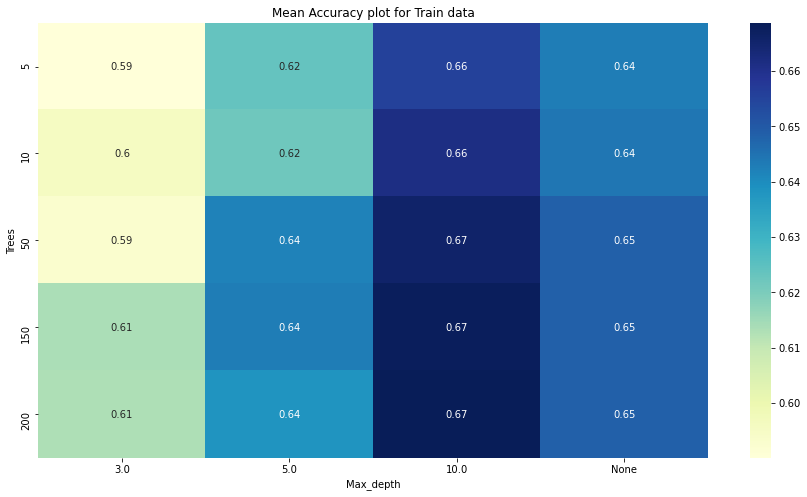

In [25]:
def rf_classifier(estimators,max_depth=None):
    RFclassifier = RandomForestClassifier(n_estimators=estimators,random_state = 0,max_depth=max_depth)
    scores = cross_val_score(RFclassifier, dataset1, y.values.ravel(), cv=10)
    acc=round(scores.mean(),4)
    return acc

trees = [5, 10, 50, 150, 200]
depth = [3, 5, 10, None]
tree_depth_acc=[]
for i in trees:
    for j in depth:
        tree_depth_acc.append([i,j,rf_classifier(estimators=i,max_depth=j)])
df_rf_acc = pd.DataFrame(tree_depth_acc, columns = ['Trees', 'Max_depth','Mean Accuracy'])
df_rf_acc.replace(np.nan,'None',inplace=True)
print(df_rf_acc)

df_rf_acc=df_rf_acc.pivot(index='Trees',columns='Max_depth',values='Mean Accuracy')
#Plotting the graph
plt.figure(figsize=(15,8))
sns.heatmap(data=df_rf_acc,annot=True,cmap="YlGnBu")
plt.title("Mean Accuracy plot for Train data")
plt.show()

   Estimators  Mean Accuracy
0           5         0.6593
1          10         0.6603
2          50         0.6688
3         150         0.6669
4         200         0.6666


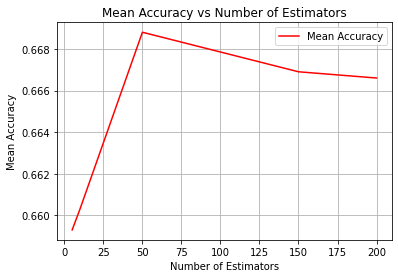

In [26]:
def gb_classifier(estimators):
    gbclassifier = GradientBoostingClassifier(n_estimators=estimators,random_state = 0)
    scores = cross_val_score(gbclassifier, dataset1, y.values.ravel(), cv=10)
    acc=round(scores.mean(),4)
    return acc

bstages = [5, 10, 50, 150, 200]
bstages_acc=[]
for i in bstages:
    bstages_acc.append([i,gb_classifier(estimators=i)])
df_gb_acc = pd.DataFrame(bstages_acc, columns = ['Estimators','Mean Accuracy'])
print(df_gb_acc)

#Plot graph for different number of estimators and corresponding accuracy scores
df_gb_acc.plot(x='Estimators', y='Mean Accuracy', color='red');
plt.grid();
plt.title('Mean Accuracy vs Number of Estimators');
plt.xlabel('Number of Estimators');
plt.ylabel('Mean Accuracy');

In [27]:
def nb_classifier(var_smooth):
    nbclassifier = GaussianNB(var_smoothing=var_smooth)
    nbclassifier.fit(dataset1,y.values.ravel())
    scores = cross_val_score(nbclassifier, dataset1, y.values.ravel(), cv=10)
    acc_mean=scores.mean()
    return acc_mean

smooth = [1e-10, 1e-9, 1e-5, 1e-3, 1e-1]
smooth_acc=[]
for i in smooth:
    z=nb_classifier(var_smooth=i)
    smooth_acc.append([i,z])
df_nb_acc = pd.DataFrame(smooth_acc, columns = ['Smoothing_Value','Mean Accuracy'])
df_nb_acc

,Smoothing_Value,Mean Accuracy
0,1.000000e-10,0.479909
1,1.000000e-09,0.491436
2,1.000000e-05,0.562836
3,1.000000e-03,0.595064
4,1.000000e-01,0.611046


In [28]:
gbclassifier = GradientBoostingClassifier(n_estimators=50,random_state = 0)
gbclassifier.fit(dataset1,y)
yGB = gbclassifier.predict(dataset1_test)
y1=np.where(yGB=='Not Resolved','not Resolved',np.where(yGB=='Resolved','resolved',np.where(yGB=='Fatal','fatal',yGB)))
y2 =pd.DataFrame(y1,columns=['Outcome1'])
covid_t1 =pd.DataFrame(df_test['id'],columns=['id'])
y_final = pd.concat([covid_t1, y2], axis=1)
y_final
y_final.to_csv(r'C:\\Users\\mps\\OneDrive - University of Waterloo\\Documents\\657A\\A2\\A2\\Covid\Kaggle\\covidSC__gb26.2.csv',index=False)